# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_qty = 1.2
eth_qty = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_api = requests.get(btc_url).json()

In [6]:
# check out the data formatting
# print(json.dumps(btc_api, indent=4))

In [7]:
btc_price = btc_api["data"]["1"]["quotes"]["USD"]["price"]

In [8]:
# Fetch current ETH price
eth_api = requests.get(eth_url).json()

In [9]:
# print(json.dumps(eth_api, indent=4))

In [10]:
eth_price = eth_api["data"]["1027"]["quotes"]["USD"]["price"]
eth_price

2245.85

In [11]:
# Compute current value of my crpto
my_btc = btc_price * btc_qty
my_eth = eth_price * eth_qty

my_crypto = my_btc + my_eth

# Print current crypto wallet balance
print(f"The current value of your {btc_qty:,.2f} BTC is ${my_btc:,.2f} at a price of ${btc_price:,.2f}")
print(f"The current value of your {eth_qty:,.2f} ETH is ${my_eth:,.2f} at a price of ${eth_price:,.2f}")
print(f"The total value of your crypto investments is ${my_crypto:,.2f}")

The current value of your 1.20 BTC is $43,321.20 at a price of $36,101.00
The current value of your 5.30 ETH is $11,903.00 at a price of $2,245.85
The total value of your crypto investments is $55,224.20


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [12]:
# Set current amount of shares

# my_agg = 200
# my_spy = 50

shares_data = {"Shares": [200, 50]}
shares_data

{'Shares': [200, 50]}

In [13]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [14]:
print(f"Alpaca Key type: {alpaca_api_key}")
print(f"Alpaca Secret Key type: {alpaca_secret_key}")

Alpaca Key type: PKDBWJDWXVIHAA9HLVAZ
Alpaca Secret Key type: 1F6wxBaPCqcD0a5tX5GhTH2qIT5TF4ZW0w6jBQUT


In [15]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# print(f"Quandl Key type: {type(quandl_api_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [16]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
from datetime import datetime

In [18]:
# today_date = datetime.today().strftime('%Y-%m-%d')
# today_date = '2021-06-18' removes hard coded date

In [19]:
# Format current date as ISO format
# today = pd.Timestamp(today_date, tz="America/New_York").isoformat()
# today = pd.Timestamp(today_date, tz="Australia/Melbourne").isoformat()
# today

# Had to abandon the above script as it is the weekend
# and today's date is a Saturday in the US and data would not load
# Back to hard coding the date

In [20]:
start_date = pd.Timestamp("2020-06-18", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-18", tz="America/New_York").isoformat()

In [21]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG  
# portfolio_download = alpaca.get_barset(
#    tickers,
#    timeframe,
#    start = today,
#    end = today,
#    limit = 50,
#).df

portfolio_download = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000,
).df

In [22]:
# Preview DataFrame
# display(portfolio_download)
portfolio_download.head()

AGG                                       SPY  \
                             open    high     low   close   volume     open   
time                                                                          
2020-06-18 00:00:00-04:00  117.88  117.88  117.64  117.79  5689912  310.005   

                                                            
                            high     low   close    volume  
time                                                        
2020-06-18 00:00:00-04:00  312.3  309.51  311.74  64298819

In [23]:
# Create the shares DataFrame with `tickers` as index
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,Shares
AGG,200
SPY,50


In [24]:
# Pick AGG and SPY close prices
agg_close_price = float (portfolio_download["AGG"]["close"][0])
spy_close_price = float (portfolio_download["SPY"]["close"][0])

In [25]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.79
Current SPY closing price: $311.74


In [26]:
df_shares["Price"] = [agg_close_price, spy_close_price]
df_shares

,Shares,Price
AGG,200,117.79
SPY,50,311.74


In [27]:
# Compute the current value of shares
agg_value = agg_close_price * df_shares.loc["AGG"]["Shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["Shares"]

my_shares = agg_value + spy_value

In [28]:
agg_qty = (df_shares.loc["AGG"]["Shares"])
spy_qty = (df_shares.loc["SPY"]["Shares"])

In [29]:
# Print current value of shares

print(f"The current value of your {spy_qty} SPY shares is ${spy_value}")
print(f"The current value of your {agg_qty} AGG shares is ${agg_value:,.2f}")
print(f"The total value of your shares is ${my_shares:,.2f}")

The current value of your 50.0 SPY shares is $15587.0
The current value of your 200.0 AGG shares is $23,558.00
The total value of your shares is $39,145.00


In [30]:
# Add column `value` to `df_shares` to show current values of stocks
df_shares['Value']=[agg_value, spy_value]
df_shares

,Shares,Price,Value
AGG,200,117.79,23558.0
SPY,50,311.74,15587.0


### Savings Health Analysis

In [31]:
# Set monthly household income
monthly_income = 12000

In [32]:
# Consolidate financial assets data
my_crypto

55224.204999999994

In [33]:
my_shares

39145.0

In [34]:
total_savings = my_shares + my_crypto
total_savings

94369.20499999999

In [35]:
# Create savings DataFrame
df_total_savings = [my_shares, my_crypto]
df_total_savings = pd.DataFrame(df_total_savings, columns = ['Value'], index = ['crypto','shares'])
# So unfair, took me 10 minutes to work out dataframe <> DateFrame == Saturday Night = Glass of Red Wine

# Display savings DataFrame
display(df_total_savings)

,Value
crypto,39145.000
shares,55224.205


<AxesSubplot:title={'center':'My Savings Mix'}, ylabel='Value'>

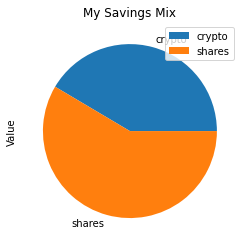

In [36]:
# Plot savings pie chart
df_total_savings.plot.pie(y="Value", title = "My Savings Mix")

<AxesSubplot:title={'center':'Mix of Stocks in Portfolio'}, ylabel='Value'>

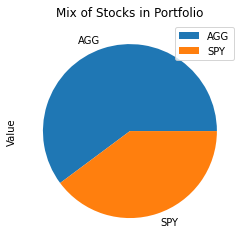

In [37]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="Value", title = "Mix of Stocks in Portfolio")

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [39]:
# Calculate total amount of savings
total_savings

94369.20499999999

In [40]:
# Validate saving health

savings_are_good = total_savings - emergency_fund
savings_are_good

58369.20499999999

In [41]:
savings_are_poor = emergency_fund - total_savings
savings_are_poor

-58369.20499999999

In [42]:
#for result in total_savings:
if total_savings > emergency_fund:
    print(f"BOOOOM! You are ${savings_are_good:,.2f} over your emergency fund target, don't let it wither!")
elif total_savings < emergency_fund:
    print(f"Oh no! Save some more! You are {savings_are_poor:,.2f} short!")
elif total_savings == emergency_fund:
    print("Congratulations! Savings are spot on! You really know how to budget!")
    
# Went back to Week 2 Lesson 2 iterate lists for help

BOOOOM! You are $58,369.20 over your emergency fund target, don't let it wither!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [43]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

#https://www.saltycrane.com/blog/2010/10/how-get-date-n-days-ago-python/

# from datetime import datetime, timedelta
# N = 365 * 5
# start_date = datetime.now() - timedelta(days=N)
# end_date = datetime.now()

# start_date = pd.Timestamp('2016-06-18', tz='Australia/Melbourne').isoformat()
# end_date = pd.Timestamp('2021-06-18', tz='Australia/Melbourne').isoformat()

start_date = pd.Timestamp('2016-06-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-18', tz='America/New_York').isoformat()

print(start_date)
print(end_date)

2016-06-18T00:00:00-04:00
2021-06-18T00:00:00-04:00


In [44]:
# Number of days in 5 years
print(365 * 5)

1825


In [45]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Get 5 years' worth of historical data for SPY and AGG
portfolio_download = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
portfolio_download.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2017-06-29 00:00:00-04:00  109.53  109.6800  109.465  109.64  2457876  243.66   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.460  109.49  2201175  242.26   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.010  109.08  1681516  242.91   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.000  109.15  2694196  242.62   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.820  108.95  2057393  241.88   

                                                              
                             high      low   close    volume  
time                                                          
2017-06-29 00:00:00-04:00  243.72  239.955  241.39  87799860  
2017-06-30 00:00:00-04:00  242.71  241.575  241.77  50347309  
2017-07-03 00:00:00-04:00  243.38  242.290  242.32  27234078  
2017-07-05 00:00:00-04:00  243.01  241.700  242.77  41067682  
2017-07-06 00:00:00-04:00  242.03  240.340  240.58  52390161

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# Use the Alpaca API to fetch five years historical closing prices for a traditional `40/60` portfolio using the `SPY` and `AGG` tickers to represent 
# the `60%` stocks (`SPY`) and `40%` bonds (`AGG`) composition of the portfolio

monte_30yr = MCSimulation(
    portfolio_data = portfolio_download, 
    weights = [.60,.40], 
    num_simulation = 500, 
    num_trading_days = 252*30
)

In [47]:
print(252*30)

7560


In [48]:
# Printing the simulation input data
monte_30yr.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2017-06-29 00:00:00-04:00  109.53  109.6800  109.465  109.64  2457876   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.460  109.49  2201175   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.010  109.08  1681516   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.000  109.15  2694196   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.820  108.95  2057393   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-29 00:00:00-04:00          NaN  243.66  243.72  239.955  241.39   
2017-06-30 00:00:00-04:00    -0.001368  242.26  242.71  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.38  242.290  242.32   
2017-07-05 00:00:00-04:00     0.000642  242.62  243.01  241.700  242.77   
2017-07-06 00:00:00-04:00    -0.001832  241.88  242.03  240.340  240.58   

                                                  
                             volume daily_return  
time                                              
2017-06-29 00:00:00-04:00  87799860          NaN  
2017-06-30 00:00:00-04:00  50347309     0.001574  
2017-07-03 00:00:00-04:00  27234078     0.002275  
2017-07-05 00:00:00-04:00  41067682     0.001857  
2017-07-06 00:00:00-04:00  52390161    -0.009021

In [49]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
monte_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002760,1.002643,0.997878,0.996729,1.006972,1.001242,1.002186,1.002428,0.999343,1.009282,...,1.005215,1.004311,1.000771,0.997162,0.992614,0.997234,0.999680,0.998844,1.001103,0.992996
2,1.013411,0.999424,0.998946,0.998555,1.011914,1.004480,0.994047,1.003898,1.007315,1.011736,...,1.009323,1.001348,1.002826,1.003534,1.005398,0.993577,0.994669,0.998051,1.010578,0.999989
3,1.011379,0.996607,0.999441,0.998148,1.015191,1.005439,1.000956,1.003617,1.000191,1.009902,...,1.007751,1.000008,1.009980,1.011619,1.013777,0.979686,0.992496,1.008221,1.021549,0.999524
4,1.005695,1.000037,1.001302,0.996102,1.012470,1.010236,0.996866,0.994698,1.005635,1.011965,...,1.006575,0.993417,1.018763,1.014516,1.004586,0.974683,0.985102,1.014438,1.010588,1.002209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.636070,5.352800,4.627342,9.102749,13.501228,6.292669,6.581723,5.369012,7.346389,26.623595,...,8.321907,11.369751,27.220984,6.126044,9.520181,4.132655,9.810893,22.412271,11.150081,2.883638
7557,8.715053,5.356740,4.615525,9.146906,13.460408,6.320830,6.556894,5.375899,7.330097,26.685560,...,8.403510,11.352313,27.364231,6.105029,9.493548,4.158003,9.905249,22.456191,11.159705,2.896898
7558,8.666755,5.361960,4.656096,9.098738,13.545901,6.324485,6.597609,5.440374,7.333978,26.689228,...,8.377349,11.464521,27.413875,6.055923,9.444965,4.132319,9.920175,22.486941,11.119951,2.896763
7559,8.716401,5.361304,4.622510,9.050153,13.453789,6.456847,6.593480,5.457796,7.352221,26.754467,...,8.283938,11.492841,27.385528,6.062397,9.471981,4.150742,9.945527,22.741430,11.132039,2.890689


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

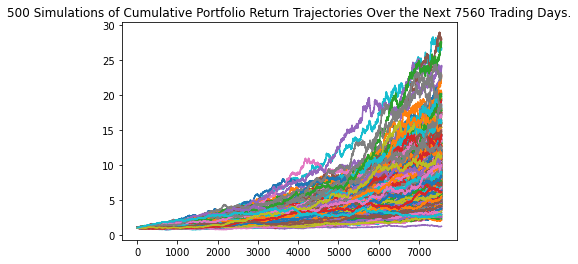

In [50]:
# Plot simulation outcomes
monte_30yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

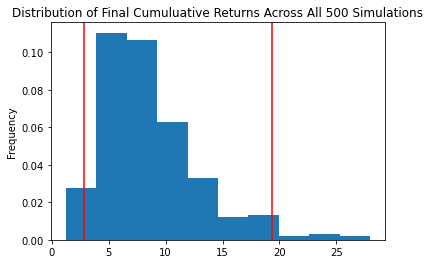

In [51]:
# Plot probability distribution and confidence intervals
monte_30yr.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stats = monte_30yr.summarize_cumulative_return()

# Print summary statistics
print (MC_stats)

count           500.000000
mean              8.626085
std               4.309308
min               1.213274
25%               5.652277
50%               7.559822
75%              10.782681
max              27.989245
95% CI Lower      2.843724
95% CI Upper     19.378634
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_stats[8]*initial_investment
ci_upper = MC_stats[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $56874.4756656158 and $387572.6768127879


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [54]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_stats[8]*initial_investment
ci_upper = MC_stats[9]*initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $85311.71349842369 and $581359.0152191819


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [57]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [58]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl_5yrs = MC_dist_5yrs.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

NameError: name 'MC_dist_5yrs' is not defined

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")